In [62]:
import os

# List of files to process
files_to_process = [
    'results/files/results_geometry_3k_baseline_cot_20240523_004840.json',
    'results/files/results_geometry_3k_baseline_direct_20240521_092635.json',
    'results/files/results_geometry_3k_finetuned_20240521_102206.json'
]

# Run the results.py script for each file
for file in files_to_process:
    os.system(f'python results/results.py --file "{file}" --key "extracted_answer"')


Accuracy: 21.80%
Total items: 601
Accuracy: 23.29%
Total items: 601
Accuracy: 27.62%
Total items: 601


In [41]:
import json

# Load the JSON data from the files
with open('results/files/results_geometry_3k_baseline_cot_20240523_004840.json', 'r') as file1, \
     open('results/files/results_geometry_3k_baseline_direct_20240521_092635.json', 'r') as file2, \
     open('results/files/results_geometry_3k_finetuned_20240521_102206.json', 'r') as file3:
    results_geometry_3k_baseline_cot = json.load(file1)
    results_geometry_3k_baseline_direct = json.load(file2)
    results_geometry_3k_finetuned = json.load(file3)


In [48]:
def display_prediction(number, data, show_details=True):
    if 0 <= number < len(data):
        entry = data[number]
        
        if show_details:
            # Display the question
            print(f"Question: {entry['problem_text']}")
            # Display the choices
            choices = entry.get('choices', [])
            if choices:
                print("Choices:")
                for idx, choice in enumerate(choices, start=1):
                    print(f"{idx}. {choice}")
            else:
                print("No choices available.")
            
            # Display the image
            from IPython.display import Image, display
            image_path = f"dataset/eval/geometry_3k/images/{entry['image_id']}.png"
            display(Image(filename=image_path, width=200))
        
        # Display the predicted answer
        print(f"Predicted Answer: {entry['predicted_answer']}")
        
        from IPython.display import display, HTML
        display(HTML(f"<span style='color: green;'>Predicted Extracted Answer: {entry['extracted_answer']}</span>"))
        display(HTML(f"<span style='color: red; font-weight: bold;'>Correct Answer: {entry['answer']}</span>"))
    else:
        print(f"Invalid number: {number}. It should be between 0 and {len(data) - 1}.")


Displaying predictions for question 0 across all datasets:

Dataset: results_geometry_3k_baseline_direct
Question: Find the area of the figure.
Choices:
1. 30
2. 60
3. 120
4. 240


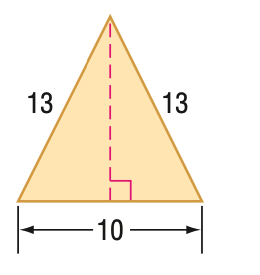

Predicted Answer: C. 120



Dataset: results_geometry_3k_baseline_cot
Predicted Answer: C. 120



Dataset: results_geometry_3k_finetuned
Predicted Answer: To find the area of the figure, we need to follow these steps:

1. **Identify the type of triangle**: The triangle is a right triangle, as indicated by the presence of a right angle.

2. **Determine the base and height**: The base of the triangle is given as 13 units, and the height is 10 units.

3. **Use the formula for the area of a right triangle**: The area of a right triangle is given by the formula: \( \text{Area} = \frac{1}{2} \times \text{base} \times \text{height} \).

4. **Substitute the values**: Substitute the given values into the formula: \( \text{Area} = \frac{1}{2} \times 13 \times 10 \).

5. **Calculate the area**: Simplify the expression: \( \text{Area} = \frac{1}{2} \times 130 \) = 65 square units.

Therefore, the area of the figure is 65 square units.

Answer: B




Displaying predictions for question 5 across all datasets:

Dataset: results_geometry_3k_baseline_direct
Question: Find the value of x in the diagram.
Choices:
1. 68
2. 78
3. 79
4. 136


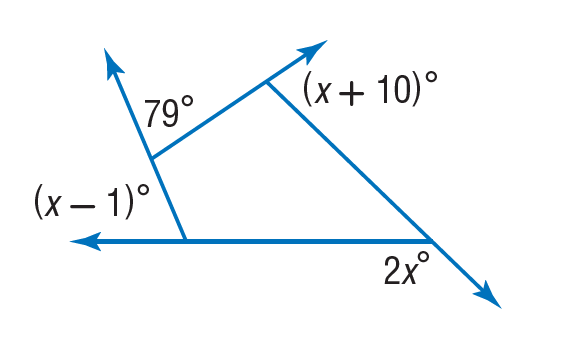

Predicted Answer: C. 79



Dataset: results_geometry_3k_baseline_cot
Predicted Answer: C. 79



Dataset: results_geometry_3k_finetuned
Predicted Answer: To find the value of \( x \) in the diagram, follow these steps:

1. **Identify the angles:**
   - The diagram shows two intersecting lines forming four angles.
   - The angles \( \angle 1 \) and \( \angle 2 \) are given as \( 79^\circ \) and \( 2x^\circ \) respectively.
   - The angles \( \angle 3 \) and \( \angle 4 \) are not directly given.

2. **Use the angle sum property:**
   - The sum of the angles around a point is \( 180^\circ \).
   - Since the lines intersect, the sum of the angles on one side of the intersection is \( 180^\circ \).

3. **Set up the equation:**
   - The sum of the angles on one side of the intersection is \( x - 1 + 2x + 10 \) degrees.
   - Set this equal to \( 180^\circ \):
   \[
   x - 1 + 2x + 10 = 180
   \]

4. **Solve for \( x \):**
   - Combine like terms:
   \[
   3x + 9 = 180
   \]
   - Subtract 9 from both sides:
   \[
   3x = 171
   \]
   - Divide by 3:
   \[
   x = 57
   \]

5. **Check the 



Displaying predictions for question 10 across all datasets:

Dataset: results_geometry_3k_baseline_direct
Question: Find the area of the shaded region. Round to the nearest tenth.
Choices:
1. 104.7
2. 157.1
3. 235.6
4. 314.2


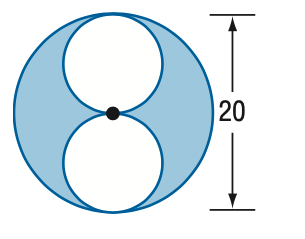

Predicted Answer: C. 235.6



Dataset: results_geometry_3k_baseline_cot
Predicted Answer: C. 235.6



Dataset: results_geometry_3k_finetuned
Predicted Answer: To find the area of the shaded region, we need to calculate the area of the larger circle and subtract the area of the smaller circle.

1. **Calculate the area of the larger circle**:
   - The radius of the larger circle is 20 units.
   - The formula for the area of a circle is \( A = \pi r^2 \).
   - Substitute the radius into the formula: \( A = \pi \times 20^2 = 400 \pi \).

2. **Calculate the area of the smaller circle**:
   - The radius of the smaller circle is 8 units.
   - Substitute the radius into the formula: \( A = \pi \times 8^2 = 64 \pi \).

3. **Subtract the area of the smaller circle from the area of the larger circle**:
   - \( 400 \pi - 64 \pi = 336 \pi \).

4. **Round the result to the nearest tenth**:
   - \( 336 \pi \approx 1047.2 \).

Therefore, the area of the shaded region is approximately \( 1047.2 \).

Answer: D




Displaying predictions for question 15 across all datasets:

Dataset: results_geometry_3k_baseline_direct
Question: Find y in the figure.
Choices:
1. 5
2. 6
3. 7
4. 8


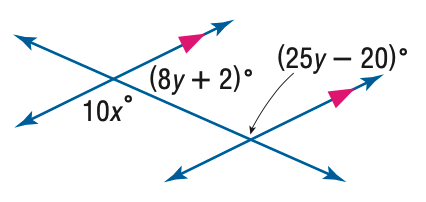

Predicted Answer: D. 8



Dataset: results_geometry_3k_baseline_cot
Predicted Answer: D. 8



Dataset: results_geometry_3k_finetuned
Predicted Answer: To find \( y \) in the given diagram, follow these steps:

1. **Identify the angles:**
   - The angles \( 8y + 2 \) and \( 25y - 20 \) are given.
   - The angle \( 10x \) is also provided.

2. **Set up the equation:**
   - The sum of the angles on a straight line is 180°.
   - Therefore, \( 8y + 2 + 25y - 20 + 10x = 180 \).

3. **Combine like terms:**
   - Simplify the equation: \( 33y + 10x = 180 \).

4. **Solve for \( y \):**
   - Rearrange the equation to isolate \( y \): \( 33y = 180 - 10x \).
   - Divide both sides by 33: \( y = \frac{180 - 10x}{33} \).

5. **Substitute the given value of \( x \):**
   - Substitute \( x = 10 \) into the equation: \( y = \frac{180 - 10(10)}{33} \).
   - Simplify: \( y = \frac{180 - 100}{33} \).
   - Calculate: \( y = \frac{80}{33} \).

6. **Convert to simplest form:**
   - Simplify the fraction: \( y \approx 2.45 \).

7. **Choose the correct answer:**
   - The closest choice to \( 2.45 \) is



Displaying predictions for question 20 across all datasets:

Dataset: results_geometry_3k_baseline_direct
Question: Find the perimeter of the parallelogram. Round to the nearest tenth if necessary.
Choices:
1. 60
2. 62
3. 64
4. 66


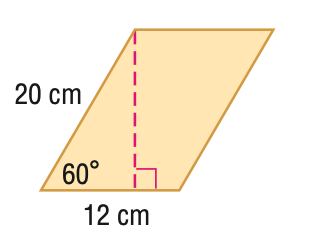

Predicted Answer: The perimeter of the parallelogram is 60 cm.



Dataset: results_geometry_3k_baseline_cot
Predicted Answer: The perimeter of the parallelogram is 60 cm.



Dataset: results_geometry_3k_finetuned
Predicted Answer: To find the perimeter of the parallelogram, we need to add up the lengths of all four sides.

1. **Identify the given side lengths:**
   - The length of one side (base) is 20 cm.
   - The length of the adjacent side (height) is 12 cm.
   - The angle between the base and the adjacent side is 60°.

2. **Use the properties of a parallelogram:**
   - The opposite sides of a parallelogram are equal in length.
   - The adjacent sides of a parallelogram are supplementary (sum to 180°).

3. **Calculate the length of the other two sides:**
   - The adjacent side to the base is the height, which is 12 cm.
   - The opposite side to the base is also 12 cm, as it is the height.

4. **Calculate the perimeter:**
   - Perimeter = Base + Height + Base + Height
   - Perimeter = 20 cm + 12 cm + 20 cm + 12 cm
   - Perimeter = 64 cm

5. **Round to the nearest tenth if necessary:**
   - The perimeter is 64 cm.

Therefore, the correct answer is C. 64.

In [58]:
questions_to_display = [0, 5, 10, 15, 20]

for question in questions_to_display:
    print(f"Displaying predictions for question {question} across all datasets:")
    
    print("\nDataset: results_geometry_3k_baseline_direct")
    display_prediction(question, results_geometry_3k_baseline_direct, show_details=True)
    
    print("\nDataset: results_geometry_3k_baseline_cot")
    display_prediction(question, results_geometry_3k_baseline_cot, show_details=False)
    
    print("\nDataset: results_geometry_3k_finetuned")
    display_prediction(question, results_geometry_3k_finetuned, show_details=False)
    
    print("\n" + "="*50 + "\n")

In [54]:
# Find items where the predicted answer is not one of A, B, C, or D for finetuned
invalid_predicted_answers_finetuned = [item for item in results_geometry_3k_finetuned if item['extracted_answer'] not in ['A', 'B', 'C', 'D']]

# Calculate the percentage of such items for finetuned
total_items_finetuned = len(results_geometry_3k_finetuned)
invalid_percentage_finetuned = (len(invalid_predicted_answers_finetuned) / total_items_finetuned) * 100

# Display the results for finetuned
print(f"Number of items with invalid predicted answers (finetuned): {len(invalid_predicted_answers_finetuned)}")
print(f"Percentage of items with invalid predicted answers (finetuned): {invalid_percentage_finetuned:.2f}%")

# Find items where the predicted answer is not one of A, B, C, or D for baseline_direct
invalid_predicted_answers_direct = [item for item in results_geometry_3k_baseline_direct if item['extracted_answer'] not in ['A', 'B', 'C', 'D']]

# Calculate the percentage of such items for baseline_direct
total_items_direct = len(results_geometry_3k_baseline_direct)
invalid_percentage_direct = (len(invalid_predicted_answers_direct) / total_items_direct) * 100

# Display the results for baseline_direct
print(f"Number of items with invalid predicted answers (baseline_direct): {len(invalid_predicted_answers_direct)}")
print(f"Percentage of items with invalid predicted answers (baseline_direct): {invalid_percentage_direct:.2f}%")

# Find items where the predicted answer is not one of A, B, C, or D for baseline_cot
invalid_predicted_answers_cot = [item for item in results_geometry_3k_baseline_cot if item['extracted_answer'] not in ['A', 'B', 'C', 'D']]

# Calculate the percentage of such items for baseline_cot
total_items_cot = len(results_geometry_3k_baseline_cot)
invalid_percentage_cot = (len(invalid_predicted_answers_cot) / total_items_cot) * 100

# Display the results for baseline_cot
print(f"Number of items with invalid predicted answers (baseline_cot): {len(invalid_predicted_answers_cot)}")
print(f"Percentage of items with invalid predicted answers (baseline_cot): {invalid_percentage_cot:.2f}%")

# Compare the percentages
print("\nComparison of invalid predicted answer percentages:")
print(f"Finetuned vs Baseline Direct: {'Higher' if invalid_percentage_finetuned > invalid_percentage_direct else 'Lower or Equal'}")
print(f"Finetuned vs Baseline CoT: {'Higher' if invalid_percentage_finetuned > invalid_percentage_cot else 'Lower or Equal'}")
print(f"Baseline Direct vs Baseline CoT: {'Higher' if invalid_percentage_direct > invalid_percentage_cot else 'Lower or Equal'}")


Number of items with invalid predicted answers (finetuned): 66
Percentage of items with invalid predicted answers (finetuned): 10.98%
Number of items with invalid predicted answers (baseline_direct): 7
Percentage of items with invalid predicted answers (baseline_direct): 1.16%
Number of items with invalid predicted answers (baseline_cot): 14
Percentage of items with invalid predicted answers (baseline_cot): 2.33%

Comparison of invalid predicted answer percentages:
Finetuned vs Baseline Direct: Higher
Finetuned vs Baseline CoT: Higher
Baseline Direct vs Baseline CoT: Lower or Equal
